<a href="https://colab.research.google.com/github/raaaang/Hand-Sign-Language/blob/master/darknet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
os.environ['PATH'] += ':/usr/local/cuda/bin'
!git clone https://github.com/AlexeyAB/darknet/

Cloning into 'darknet'...
remote: Enumerating objects: 13652, done.
remote: Total 13652 (delta 0), reused 0 (delta 0), pack-reused 13652
Receiving objects: 100% (13652/13652), 12.24 MiB | 17.26 MiB/s, done.
Resolving deltas: 100% (9312/9312), done.


In [0]:
!apt install gcc-5 g++-5 -y
!ln -s /usr/bin/gcc-5 /usr/local/cuda/bin/gcc 
!ln -s /usr/bin/g++-5 /usr/local/cuda/bin/g++

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  cpp-5 gcc-5-base libasan2 libgcc-5-dev libisl15 libmpx0 libstdc++-5-dev
Suggested packages:
  gcc-5-locales g++-5-multilib gcc-5-doc libstdc++6-5-dbg gcc-5-multilib
  libgcc1-dbg libgomp1-dbg libitm1-dbg libatomic1-dbg libasan2-dbg
  liblsan0-dbg libtsan0-dbg libubsan0-dbg libcilkrts5-dbg libmpx0-dbg
  libquadmath0-dbg libstdc++-5-doc
The following NEW packages will be installed:
  cpp-5 g++-5 gcc-5 gcc-5-base libasan2 libgcc-5-dev libisl15 libmpx0
  libstdc++-5-dev
0 upgraded, 9 newly installed, 0 to remove and 32 not upgraded.
Need to get 29.1 MB of archives.
After this operation, 100 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 gcc-5-base amd64 5.5.0-12ubuntu1 [17.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libisl15 amd64 0.18-4 [548 kB]
Get:3 http://arch

In [0]:
ls

darknet/  gdrive/  sample_data/


In [0]:
cd darknet

/content/darknet


In [0]:
ls

3rdparty/   CMakeLists.txt          image_yolov3.sh*        README.md
build/      DarknetConfig.cmake.in  include/                results/
build.ps1*  darknet.py              json_mjpeg_streams.sh*  scripts/
build.sh*   darknet_video.py        LICENSE                 src/
cfg/        data/                   Makefile                video_v2.sh*
cmake/      image_yolov2.sh*        net_cam_v3.sh*          video_yolov3.sh*


In [0]:
!sed -i 's/GPU=0/GPU=1/g' Makefile
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!make

chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:910:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1391:14: warning: unused variable ‘buff’ [-Wunused-variable]
         char buff[100];
              ^
./src/image_opencv.cpp:1367:9: warning: unused variable ‘it_tb_res’ [-Wunused-variable]
     int it_tb_res = cv::createTrackbar(it_trackbar_name, windo

In [0]:
!wget https://pjreddie.com/media/files/yolov3.weights
!chmod a+x ./darknet

--2020-06-10 14:10:49--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights.1’

yolov3.weights.1    100%[===================>] 236.52M  65.0KB/s    in 37m 10s 

2020-06-10 14:48:01 (109 KB/s) - ‘yolov3.weights.1’ saved [248007048/248007048]



In [0]:
from google.colab import files
uploaded = files.upload()

Saving KETI_SL_0000000001.avi to KETI_SL_0000000001.avi


In [0]:
!pwd

/content/darknet


In [0]:
!./darknet detector demo cfg/coco.data cfg/yolov3.cfg yolov3.weights -dont_show KETI_SL_0000000001.avi -i 0 -out_filename out.avi

 CUDA-version: 10010 (10010), GPU count: 1  
 OpenCV version: 3.2.0
Demo
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 c

In [0]:
import cv2, os
import matplotlib.pyplot as plt
%matplotlib inline

def predictImage(imageDir):
  os.system("cd /content/darknet && ./darknet detect cfg/yolov3.cfg yolov3.weights {}".format(imageDir))
  image = cv2.imread("/content/darknet/predictions.jpg")
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

def predictVideo(videoDir):
  os.system(""" cd /content/darknet && ./darknet detector demo cfg/coco.data cfg/yolov3.cfg yolov3.weights \
  -dont_show {} -i 0 -out_filename res.avi
  """.format(videoDir))

In [0]:
!apt update
!apt-get install libopencv-dev

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Get:11 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:12 http://archive.ubuntu.com/ubuntu

In [0]:
!make &> compile.log

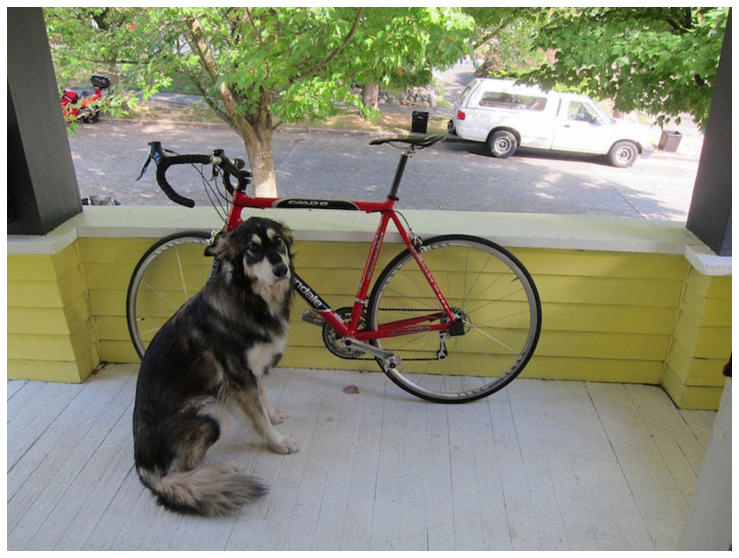

In [0]:
predictImage("data/dog.jpg")

In [0]:
predictVideo("KETI_SL_0000000001.avi")

In [0]:
!du -h res.avi

1.7M	res.avi


In [0]:
from google.colab import files
files.download('res.avi')

In [0]:
ls -al data/

total 1744
drwxr-xr-x  3 root root   4096 Jun 10 14:05 ./
drwxr-xr-x 16 root root   4096 Jun 10 15:23 ../
-rw-r--r--  1 root root 140047 Jun 10 14:05 9k.tree
-rw-r--r--  1 root root    387 Jun 10 14:05 coco9k.map
-rw-r--r--  1 root root    625 Jun 10 14:05 coco.names
-rw-r--r--  1 root root 163759 Jun 10 14:05 dog.jpg
-rw-r--r--  1 root root 141886 Jun 10 14:05 eagle.jpg
-rw-r--r--  1 root root 382965 Jun 10 14:05 giraffe.jpg
-rw-r--r--  1 root root     80 Jun 10 14:05 goal.txt
-rw-r--r--  1 root root 133495 Jun 10 14:05 horses.jpg
-rw-r--r--  1 root root 218420 Jun 10 14:05 imagenet.labels.list
-rw-r--r--  1 root root 246356 Jun 10 14:05 imagenet.shortnames.list
drwxr-xr-x  2 root root  20480 Jun 10 14:05 labels/
-rw-r--r--  1 root root   5476 Jun 10 14:05 openimages.names
-rw-r--r--  1 root root 113880 Jun 10 14:05 person.jpg
-rw-r--r--  1 root root 174515 Jun 10 14:05 scream.jpg
-rw-r--r--  1 root root    135 Jun 10 14:05 voc.names


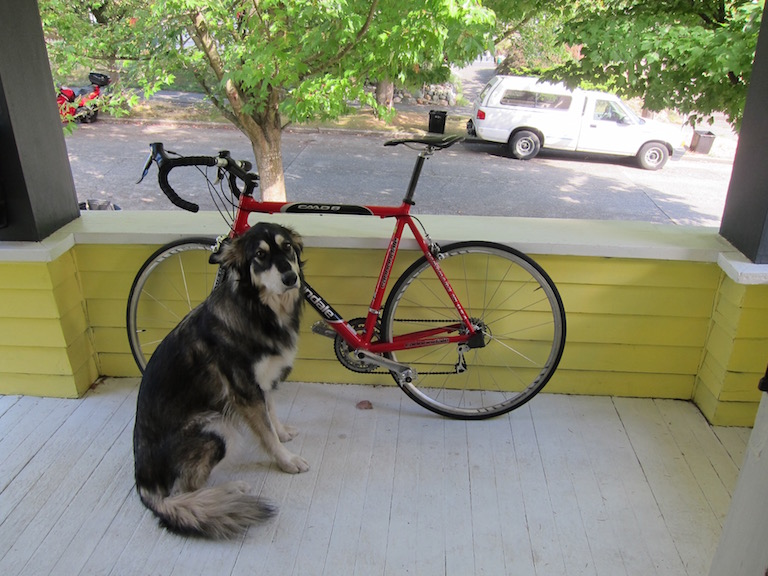

In [0]:

from IPython.display import Image
Image('data/dog.jpg')

In [0]:
ls -al results/

total 8
drwxr-xr-x  2 root root 4096 Jun 10 14:05 ./
drwxr-xr-x 16 root root 4096 Jun 10 15:23 ../
-rw-r--r--  1 root root    0 Jun 10 14:05 tmp.txt


In [0]:
!python3 darknet.py --image_folder data/dog.jpg

Traceback (most recent call last):
  File "darknet.py", line 127, in <module>
    lib = CDLL("./libdarknet.so", RTLD_GLOBAL)
  File "/usr/lib/python3.6/ctypes/__init__.py", line 348, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: ./libdarknet.so: cannot open shared object file: No such file or directory
